In [31]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [32]:
df = pd.read_csv('Position CSV/DL_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Victor Abiamiri,5,29,2.758621,NaN,NaN,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Career
1,Sam Acho,34,110,4.945455,Career,NaN,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,Gaines Adams,18,47,6.127660,NaN,NaN,37.0,NaN,0.0,0.0,...,1.0,0.0,NaN,NaN,NaN,85.0,0.0,NaN,NaN,Career
3,Mike Adams,12,53,3.622642,Career,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Mario Addison,31,126,3.936508,Career,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN


In [33]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [34]:
df.fillna(0, inplace=True)

In [35]:
for col in df.columns: 
    print(col) 

AVp16
adjusted_yards_per_attempt
assists_on_tackles
completed_passes
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
games.y
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
weight
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception


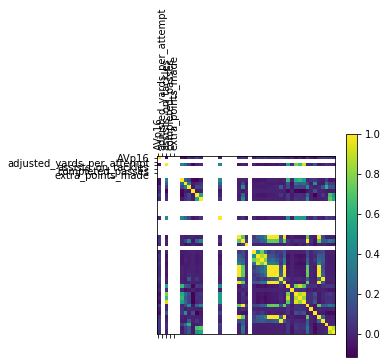

In [36]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

#from IPython.display import Image
#img=plt.to_image(format="png")
#Image(img)

In [37]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.013615466908944995
Weights:  [ 1.79118688e-11 -7.00559616e-03  1.40065737e-11 -6.80087098e-11
 -1.17861276e-11 -4.07379595e-02 -1.93839547e-01 -7.90305881e-01
  2.31449747e-01 -1.47867714e+00 -3.08979509e-11 -2.67377231e-11
 -2.51425547e-11 -6.57962573e-12  2.57473488e-02 -5.48894263e-13
 -2.86330959e-11 -7.46069873e-14 -1.48503432e-12 -8.27501006e+01
  1.03421769e-01 -4.62213475e-02  9.05941988e-14  1.14868233e+01
  4.53286762e+00 -8.56359004e+00 -1.64661377e+02  8.19112762e+01
 -4.20406071e+00 -2.01497906e+00 -9.76671710e+01  7.28276262e+00
  2.09777407e-02  1.54911977e-01  1.37401617e-03  1.19465166e-02
 -5.63157990e-03 -3.44003642e-02  0.00000000e+00  2.51788856e+00
  9.67071928e+01  1.74151205e-02  3.57449461e-02 -3.73286625e-02]


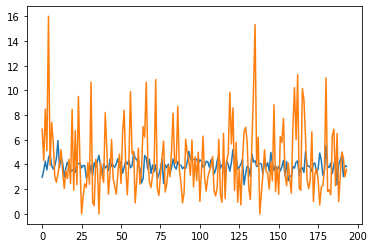

In [38]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['solo_tackles', 'passing_yards', 'safeties', 'points', 'rushing_and_receiving_touchdowns']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.00851634361597653
Weights:  [-2.87592259e-03  4.57966998e-15  7.42851370e-01  6.40920111e-02
 -2.95666223e-01]


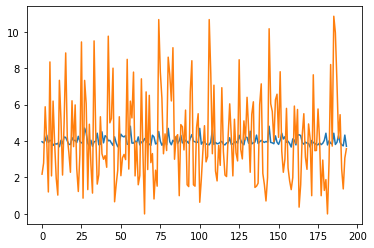

In [40]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.008538171296014752
Weights:  [-0.0028618   0.          0.68478716  0.06394083 -0.29427289]


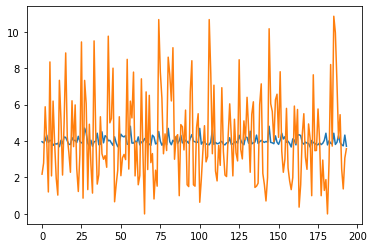

In [41]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [42]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.09907600819584866
[-5.59669774e-03 -9.63309293e-17  7.28105071e-01  6.23479855e-02
 -1.25072212e-01]

Ridge Regression
-0.05799164883325379
[-0.00556301  0.          0.62942931  0.06140979 -0.12965608]
